# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append(r"G:\My Drive\Ironhack")

from helper import clean_title

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv")

In [3]:
df.columns = clean_title(df)

In [4]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [5]:
df_filter = df[(df["total_claim_amount"] > 1000) & (df["response"] == "Yes")]
df_filter.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
189,189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,NaN
236,236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A
419,419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A
442,442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [6]:
df[df["response"]=="Yes"].pivot_table(index="policy_type", values="total_claim_amount", aggfunc="mean")

,total_claim_amount
policy_type,
Corporate Auto,421.744598
Personal Auto,454.980536
Special Auto,441.935819


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [7]:
df.groupby("customer")[["state"]].nunique().sort_values(by="state")
# no customer who has a policy in each state

,state
customer,
AA10041,1
RL64888,1
RL59810,1
RL51023,1
RL34830,1
...,...
IS48950,1
IS50283,1
IS53899,1


In [8]:
# # Count the number of customers in each state
# state_counts = df['state'].value_counts()

# # Filter the results to only include states with more than 500 customers
# filtered_state_counts = state_counts[state_counts > 500]

# filtered_state_counts

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [9]:
df_pivot = df.pivot_table(index=["education", "gender"], values="customer_lifetime_value", aggfunc=["max", "min", "median"])
df_pivot = df_pivot.round(2)
df_pivot

max                     min  \
                            customer_lifetime_value customer_lifetime_value   
education            gender                                                   
Bachelor             F                     73225.96                 1904.00   
                     M                     67907.27                 1898.01   
College              F                     61850.19                 1898.68   
                     M                     61134.68                 1918.12   
Doctor               F                     44856.11                 2395.57   
                     M                     32677.34                 2267.60   
High School or Below F                     55277.45                 2144.92   
                     M                     83325.38                 1940.98   
Master               F                     51016.07                 2417.78   
                     M                     50568.26                 2272.31   

                                             median  
                            customer_lifetime_value  
education            gender                          
Bachelor             F                      5640.51  
                     M                      5548.03  
College              F                      5623.61  
                     M                      6005.85  
Doctor               F                      5332.46  
                     M                      5577.67  
High School or Below F                      6039.55  
                     M                      6286.73  
Master               F                      5729.86  
                     M                      5579.10

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [10]:
df.pivot_table(index="state", columns="vehicle_class", values="number_of_policies", aggfunc="sum")
# month does not exist so used vehicle_class

vehicle_class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
state,,,,,,
Arizona,2974,99,95,1032,292,1071
California,5057,183,214,1925,616,1988
Nevada,1365,52,43,469,137,540
Oregon,4098,133,158,1634,442,1719
Washington,1273,61,48,446,93,568


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

In [11]:
# user vehicle class instead of month

df.groupby("state")[["number_of_policies"]].sum().nlargest(3, "number_of_policies")

,number_of_policies
state,
California,10602
Oregon,8666
Arizona,5916


*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [12]:
# # Unpivot the data to create a table that shows the customer response rate by marketing channel
# df_unpivot = df.melt(id_vars=["renew_offer_type"], value_vars=["response"])

# # Filter the data to only include responses that are "Yes"
# df_response_yes = df_unpivot[df_unpivot["value"] == "Yes"]

# # Calculate the response rate by marketing channel
# response_rate = df_response_yes.groupby("renew_offer_type").size() / df.groupby("renew_offer_type").size()

# # Convert the response rate to a DataFrame
# response_rate_df = response_rate.reset_index(name="response_rate")

# response_rate_df

In [13]:
df.pivot_table(index="response", columns="renew_offer_type", values="customer", aggfunc="count")

renew_offer_type,Offer1,Offer2,Offer3,Offer4
response,,,,
No,3560.0,2519.0,1590.0,1144.0
Yes,665.0,769.0,32.0,NaN


- Show DataFrame info.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

- Describe DataFrame.

In [15]:
df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


- Show a plot of the total number of responses.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df["response"].value_counts()

response
No     8813
Yes    1466
Name: count, dtype: int64

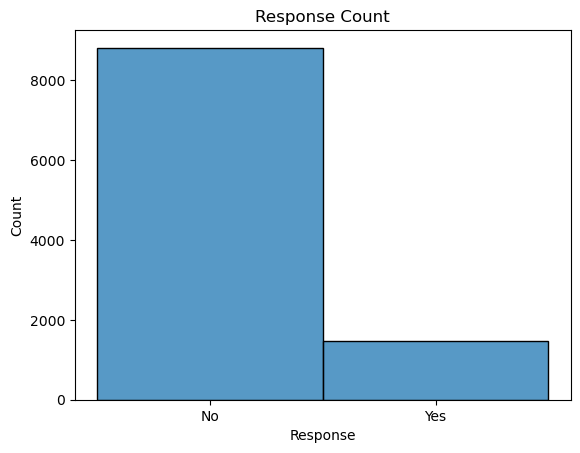

In [21]:
sns.histplot(df["response"])
plt.xlabel("Response")
plt.title("Response Count")
plt.show()

- Show a plot of the response rate by the sales channel.

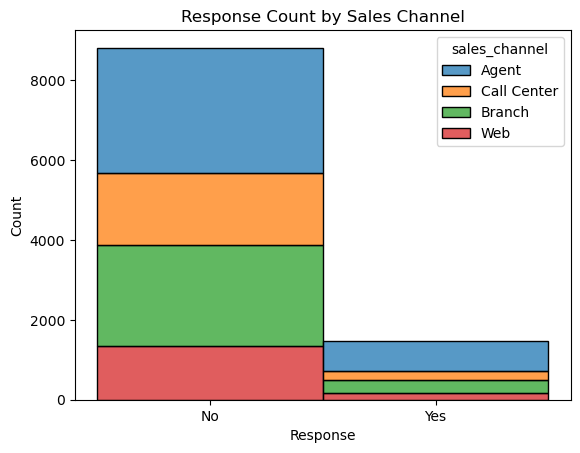

In [30]:
sns.histplot(data=df, x="response", hue="sales_channel", multiple="stack")
plt.xlabel("Response")
plt.title("Response Count by Sales Channel")
plt.show()

- Show a plot of the response rate by the total claim amount.

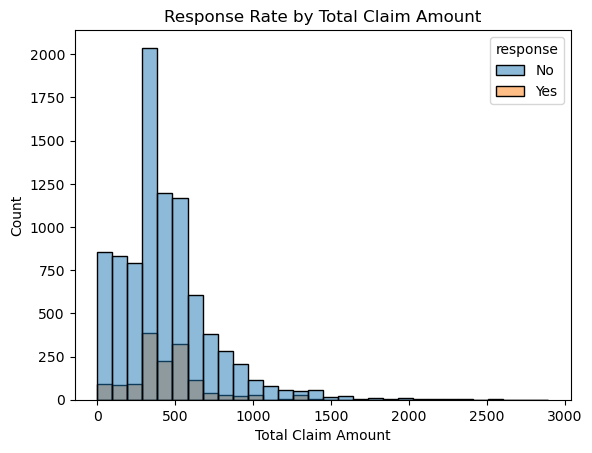

In [43]:
sns.histplot(data=df, x="total_claim_amount", hue="response", bins=30)
plt.xlabel("Total Claim Amount")
plt.ylabel("Count")
plt.title("Response Rate by Total Claim Amount")
plt.show()

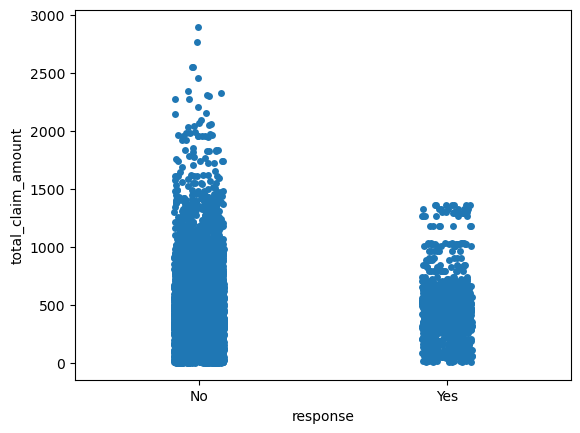

In [38]:
sns.stripplot(df, x="response", y="total_claim_amount", jitter=True)
plt.show()

- Show a plot of the response rate by income.

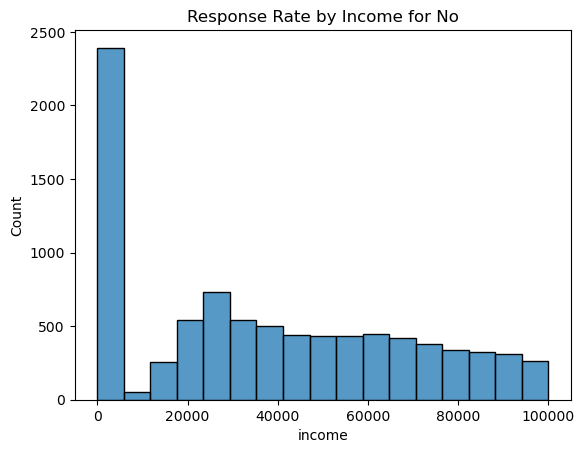

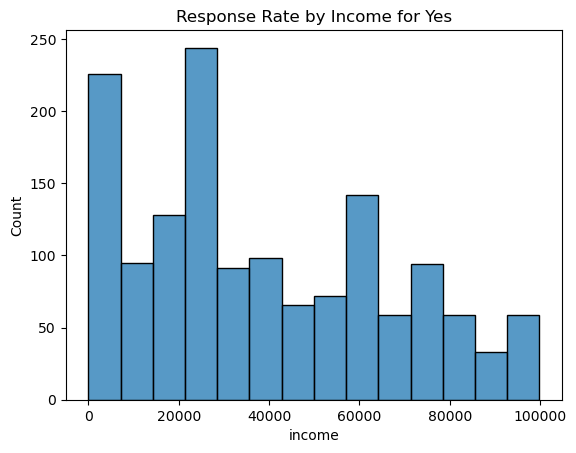

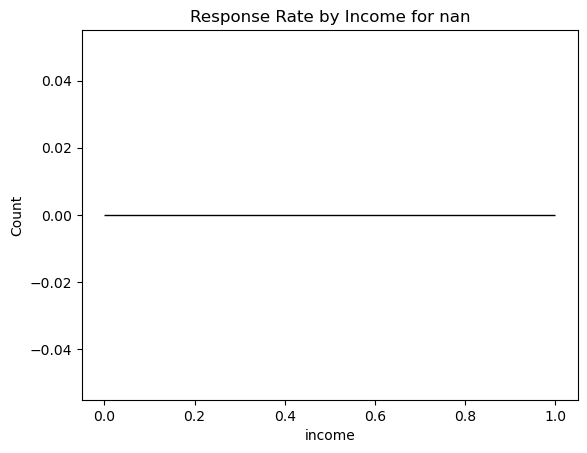

In [49]:
categories = df['response'].unique()

for category in categories:
    sns.histplot(df[df['response'] == category], x='income')
    plt.title(f'Response Rate by Income for {category}')
    plt.show()